코드 참고: https://brunch.co.kr/@hansungdev/30

# 케글의 fasion_mnist데이터로 딥러닝해보기

### 1. 데이터 불러오기 및 변환해주기

In [1]:
# 필요 패키지 로드
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
X_train = pd.read_csv('C:/Users/chunc/Desktop/취업캠프/python/python/머신러닝과 딥러닝/archive/fashion-mnist_train.csv')
X_test = pd.read_csv('C:/Users/chunc/Desktop/취업캠프/python/python/머신러닝과 딥러닝/archive/fashion-mnist_test.csv')

In [3]:
# 레이블 값 0: T-shirt/top 1: Trouser 2: Pullover 3: Dress 4: Coat 5: Sandal 6: Shirt 7: Sneaker 8: Bag 9: Ankle boot
y_train = X_train.loc[:, 'label']
y_test = X_test.loc[:, 'label']

In [4]:
y_train

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [5]:
# 훈련데이터와 테스트 데이터의 형태 출력
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_test.shape)

X_train shape:  (60000, 785)
X_test shape:  (10000, 785)
y_train shape:  (60000,)
y_train shape:  (10000,)


* 보다 편리한 시각화를 위해서 (60000, 785)의 형태를 (60000, 28, 28)의 형태로 변환해준다.

In [6]:
# train 데이터를 28*28 이미지로 변환
X_train = X_train.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
X_train.shape

(60000, 28, 28)

In [7]:
# test 데이터를 28*28 이미지로 변환
X_test = X_test.loc[:, 'pixel1':].values.reshape(-1, 28, 28)
X_test.shape

(10000, 28, 28)

### 2. 데이터의 시각화

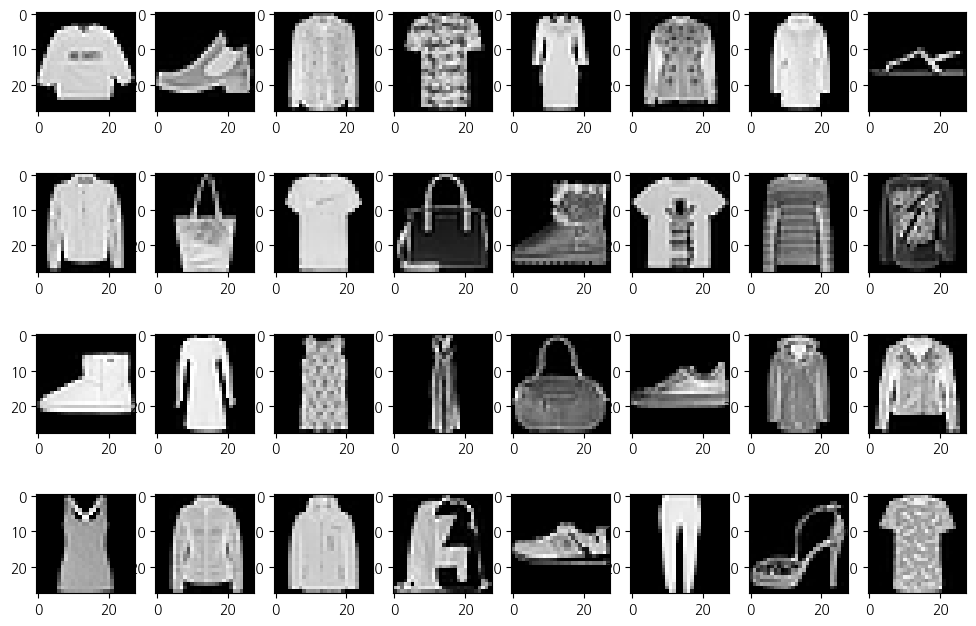

In [8]:
# train데이터 -> 텐서로 되어있는 데이터를 이미지로 확인
fig, axs = plt.subplots(figsize = (12, 8), ncols = 8, nrows = 4)
for i in range(0, 32):
    row = int(i / 8)
    col = i % 8
    axs[row][col].imshow(X_train[i], cmap = 'gray')
plt.show()

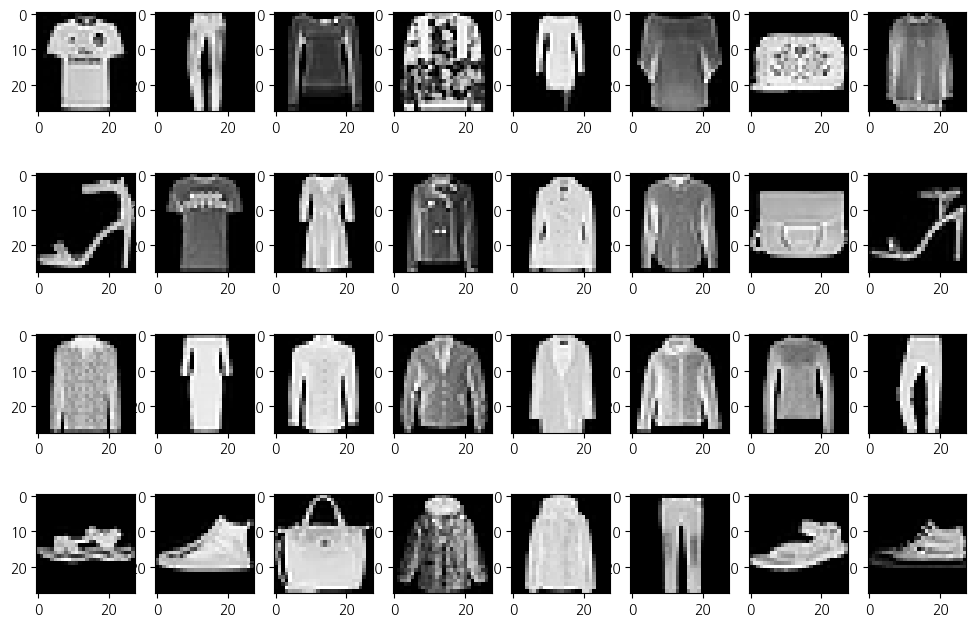

In [9]:
# test데이터 -> 텐서로 되어있는 데이터를 이미지로 확인
fig, axs = plt.subplots(figsize = (12, 8), ncols = 8, nrows = 4)
for i in range(0, 32):
    row = int(i / 8)
    col = i % 8
    axs[row][col].imshow(X_test[i], cmap = 'gray')
plt.show()

In [10]:
# 위의 이미지가 수치로 변환된 결과가 아래의 텐서이다
X_train[:3]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int64)

In [11]:
# 각 이미지는 아까 변환했던 대로 28X28 형태의 2D텐서로 표현되며, X_train에는 이러한 2D텐서가 60000개 존재한다는 의미이다
X_train.shape

(60000, 28, 28)

In [12]:
# dtype 확인
X_train.dtype

dtype('int64')

### 3. 모델 생성

In [13]:
# 신경망 모델 생성
model = keras.Sequential([layers.Dense(512, activation = 'relu'), layers.Dense(10, activation = 'softmax')])

In [14]:
# 컴파일 단계
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# 학습데이터 형태 확인
X_train[0].shape

(28, 28)

In [16]:
# 이미지 스케일 재 조정
X_train = X_train.reshape((60000, 28 * 28))

# dtype을 float으로 변환 후 0에서 1사이 값을 가지도록 255로 나눠 스케일링
X_train = X_train.astype('float32') / 255

# 테스트데이터 세트도 마찬가지로 변환 수행
X_test = X_test.reshape((10000, 28 * 28))
X_test = X_test.astype('float32') / 255

In [17]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (60000, 784)
X_test shape:  (10000, 784)


In [18]:
# 모델 훈련
model.fit(X_train, y_train, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.5639 - accuracy: 0.7997
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3902 - accuracy: 0.8577
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3471 - accuracy: 0.8741
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3197 - accuracy: 0.8826
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2971 - accuracy: 0.8914


### 4. 예측 모델 개발 및 결과 확인

In [19]:
# test데이터 10000개 중 앞에서부터 20개를 추출하여 test_digits변수에 저장
test_digits = X_test[:20]

# 학습한 모델에 입력하여 예측값을 산출하여 predictions 변수에 저장
predictions = model.predict(test_digits)

# 첫번째 예측값 확인
predictions[0]

1/1 [==============================] - 0s 103ms/step


array([3.4818897e-01, 3.4045915e-08, 5.9025540e-05, 6.1056955e-04,
       1.1169734e-05, 4.9805006e-08, 6.5111274e-01, 4.7918661e-08,
       1.7333199e-05, 1.9554879e-08], dtype=float32)

In [20]:
# 첫번째 제품 예측
predictions[0].argmax()

6

In [21]:
# 첫번째 제품의 실제값 확인
y_test[0]

0

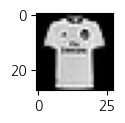

In [22]:
# 첫번째 제품을 이미지로 확인
digit = X_test[0]
digit = digit.reshape(28, 28)
fig = plt.figure(figsize = (1, 1))
plt.imshow(digit, cmap = 'gray')
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'테스트 정확도: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8675
테스트 정확도: 0.8675000071525574
